# Exploratory Data Analysis (EDA)

In this analysis, we will visualize key trends and patterns from the NBA betting dataset to understand the factors that might influence game outcomes. These visualizations will help in identifying significant features and preparing the data for training predictive models.

The dataset contains 93 columns with information on team performance, game statistics, betting lines, and more. Below, we will explore several important aspects, including team performance over time, point differentials, efficiency metrics, betting line movements, and other relevant statistics.

## Extract MySQL DB 

In [32]:
from sqlalchemy import create_engine
import pandas as pd

# Insert Database connection details
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [34]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name}', con=engine)

# Display the first few rows of the DataFrame
df.tail()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
17108,22100241,22021,1610612748,MIA,Miami Heat,2021-11-20,MIA @ WAS,L,240,38.0,...,1.100000,1.500000,0.947368,0.913580,0.5,-3.0,0.478427,0.794582,-0.5,-107.0
17109,22100254,22021,1610612766,CHA,Charlotte Hornets,2021-11-22,CHA @ WAS,W,240,40.0,...,1.277778,2.100000,0.900000,1.032967,0.0,0.0,0.833662,0.414501,-0.5,-112.5
17110,22100321,22021,1610612750,MIN,Minnesota Timberwolves,2021-12-01,MIN @ WAS,L,240,37.0,...,2.428571,1.153846,1.216216,1.034091,-1.0,0.5,0.825526,0.428537,1.0,-112.0
17111,22100334,22021,1610612739,CLE,Cleveland Cavaliers,2021-12-03,CLE @ WAS,W,240,42.0,...,2.100000,1.875000,0.904762,0.921348,0.0,-0.5,0.808318,0.456934,-4.0,-107.0
17112,22100392,22021,1610612762,UTA,Utah Jazz,2021-12-11,UTA @ WAS,W,240,48.0,...,1.307692,3.111111,0.854167,0.956989,1.5,2.0,0.296615,0.909091,-1.5,-108.5


## Visualize trends and patterns

### Distribution of Key Game Metrics by Game Outcome

In this analysis, we visualized the distribution of key game statistics such as points scored, rebounds, assists, and other performance metrics in relation to the outcome of the game (win or loss). These visualizations help in understanding how these metrics differ between winning and losing teams, which can inform feature selection for our predictive model.

We specifically focused on the following metrics:

- Points Scored: Total points scored by the home and away teams.
- Rebounds: Total rebounds (offensive and defensive) by the home and away teams.
- Assists: Total assists by the home and away teams.
- Turnovers: Total turnovers by the home and away teams.
- Field Goal Percentage: The shooting efficiency of the home and away teams.

The distributions were compared between games where the team won versus games where the team lost. This comparison is crucial for identifying which metrics are most indicative of a winning performance.

#### 1. Points Scored by Outcome (Home Team)

This plot shows the distribution of points scored by the home team, separated by whether the team won or lost the game. A higher concentration of points in the winning category suggests that scoring more points is a strong indicator of victory for the home team.



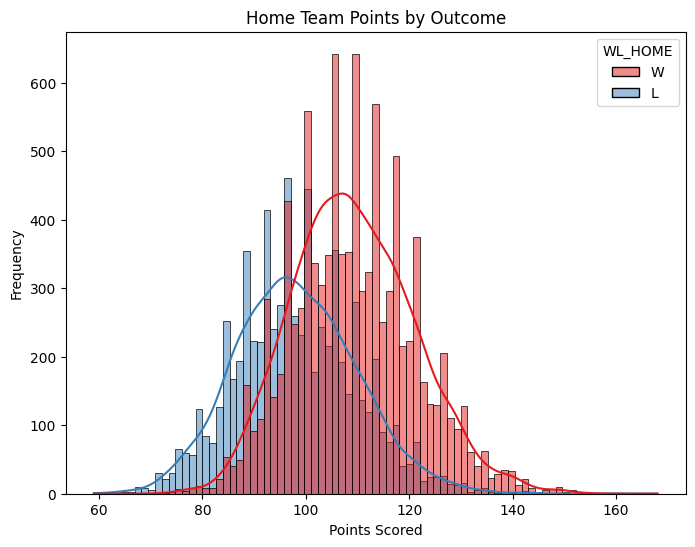

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PTS_HOME', hue='WL_HOME', kde=True, palette='Set1')
plt.title('Home Team Points by Outcome')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.show()